In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [64]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_pop_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_pop_labels_df.pkl"))

In [65]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are contains 'Saccades' in their name
# features_df = features_df.loc[:, features_df.columns.str.contains('Saccades') | features_df.columns.str.contains(config.MOVIE)]

# Remove all the features that are not contains 'DVA' in their name
features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,DVA_Mean_Gaze_Pre,DVA_Median_Gaze_Pre,DVA_Std_Gaze_Pre,DVA_Max_Gaze_Pre,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.552720,-43.736887,-58.475124,-62.524992,5.183651,-48.377805,-66.710584
2,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.904207,-34.734094,0.479160,-26.272524,-61.760188,0.359370,-33.904207
3,16,0.695662,-0.863605,8.401153,1.418288,-66.12644,15.298105,-13.893086,-3.767811,-4.103231,6.585251,0.005059,-47.513200,21.050128,-31.262722
4,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.590547,20.021469,-34.205880,-19.673346,-6.267549,-41.975040,8.165894


EDA

In [66]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie                     2243 non-null   int8   
 1   DVA_Mean_Gaze_Pre         1016 non-null   float64
 2   DVA_Median_Gaze_Pre       1016 non-null   float64
 3   DVA_Std_Gaze_Pre          1016 non-null   float64
 4   DVA_Max_Gaze_Pre          1016 non-null   float64
 5   DVA_Min_Gaze_Pre          1016 non-null   float64
 6   DVA_Sem_Gaze_Pre          1016 non-null   float64
 7   DVA_AUC_Gaze_Pre          1016 non-null   float64
 8   DVA_Mean_Fixations_Pre    1728 non-null   float64
 9   DVA_Median_Fixations_Pre  1728 non-null   float64
 10  DVA_Std_Fixations_Pre     1681 non-null   float64
 11  DVA_Max_Fixations_Pre     1728 non-null   float64
 12  DVA_Min_Fixations_Pre     1725 non-null   float64
 13  DVA_Sem_Fixations_Pre     1681 non-null   float64
 14  DVA_AUC_

In [67]:
labels_df.head()

,pop
series_id,
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [68]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2243 entries, 0 to 2242
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop     2243 non-null   float64
dtypes: float64(1)
memory usage: 35.0 KB


<AxesSubplot:>

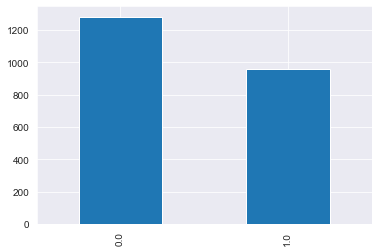

In [69]:
labels_df['pop'].value_counts().plot(kind='bar')

Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [70]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

DVA_Mean_Gaze_Pre        0.547035
DVA_Median_Gaze_Pre      0.547035
DVA_Std_Gaze_Pre         0.547035
DVA_Max_Gaze_Pre         0.547035
DVA_Min_Gaze_Pre         0.547035
DVA_Sem_Gaze_Pre         0.547035
DVA_AUC_Gaze_Pre         0.547035
DVA_Std_Fixations_Pre    0.250557
DVA_Sem_Fixations_Pre    0.250557
DVA_Min_Fixations_Pre    0.234507
dtype: float64

Remove columns with more than 30% missing values or inf values

In [71]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [72]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

DVA_Std_Fixations_Pre       0.250557
DVA_Sem_Fixations_Pre       0.250557
DVA_Min_Fixations_Pre       0.234507
DVA_Mean_Fixations_Pre      0.229603
DVA_Median_Fixations_Pre    0.229603
DVA_Max_Fixations_Pre       0.229603
DVA_AUC_Fixations_Pre       0.229603
Movie                       0.000000
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [73]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

0       0.875
1060    0.875
956     0.875
966     0.875
969     0.875
974     0.875
978     0.875
980     0.875
983     0.875
998     0.875
dtype: float64

Remove rows with more than 50% missing values

In [74]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [75]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)


844     0.375
1552    0.250
2029    0.250
837     0.250
1996    0.250
2175    0.250
1734    0.250
1475    0.250
1736    0.250
253     0.250
dtype: float64

Train/Test Split (before any preprocessing is done)

In [76]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_pop_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly with seed 1
np.random.seed(1)
np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
# subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['ME5' 'SM01' 'NT3' 'YS2' 'GL2' 'BYS5' 'AB7' 'SM03' 'YK6' 'TZ7' 'EG5'
 'AG1' 'RB7' 'AH3' 'ZL0' 'RB88' 'MM7' 'BY8' 'IN9' 'AY1' 'EC0' 'MG4' 'TN8'
 'VZ9' 'HS0' 'JR9' 'MR5' 'ED9' 'EV2' 'BR3' 'YF58' 'EB9' 'ME8' 'YC8' 'DS6'
 'AA9' 'RP8' 'SH2' 'BB6' 'YG3' 'GR5' 'YM7']
['BD7' 'CS7' 'TR3' 'MK2' 'RO5']


In [77]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df['pop'],
#                                                     random_state=420,
#                                                     test_size=0.2)

In [78]:
X_train.head()

,Movie,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
1,18,-48.552720,-43.736887,-58.475124,-62.524992,5.183651,-48.377805,-66.710584
2,27,-33.904207,-34.734094,0.479160,-26.272524,-61.760188,0.359370,-33.904207
3,16,-3.767811,-4.103231,6.585251,0.005059,-47.513200,21.050128,-31.262722
4,22,-6.590547,20.021469,-34.205880,-19.673346,-6.267549,-41.975040,8.165894
6,3,79.610103,88.313628,58.361655,62.611027,-50.459614,43.275385,86.794507


In [79]:
y_train

,pop
series_id,
1,1.0
2,0.0
3,0.0
4,1.0
6,0.0
...,...
2236,1.0
2239,0.0
2240,1.0


Fill missing values with the mean of the column

In [80]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(0)

Remove columns with low variance (threshold = 5%)

In [81]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

['DVA_AUC_Fixations_Pre']


Remove highly correlated features

In [82]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [83]:
X_train.shape

(1493, 6)

Balancing the dataset

In [84]:
y_train.value_counts()

pop
0.0    887
1.0    606
dtype: int64

SMOTE

In [85]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=420)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [87]:
y_train.value_counts()

pop
0.0    887
1.0    887
dtype: int64

Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

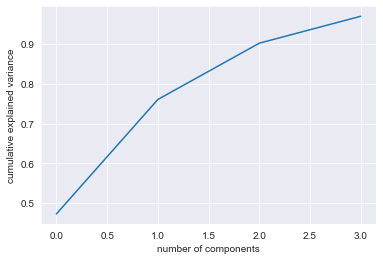

In [89]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [90]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [91]:
X_train_pca

array([[-3.62801381, -0.15115534,  0.04901658,  0.41018129],
       [-1.61642999,  0.87671116,  0.10518053,  0.07091632],
       [-0.04873497,  0.36447537, -0.14071698,  0.06058997],
       ...,
       [-2.15513192, -0.23853947, -0.28306949,  0.28772933],
       [-0.82314601, -0.40342029, -0.06990274, -0.05005999],
       [-0.6667538 , -0.75711878, -0.20883587, -0.08149655]])

LDA

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

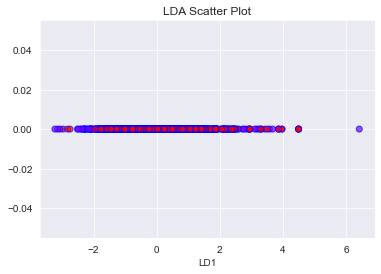

In [93]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [94]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [96]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [97]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.46
Precision: 0.57
Recall: 0.39
F1-score: 0.46
ROC-AUC score: 0.48


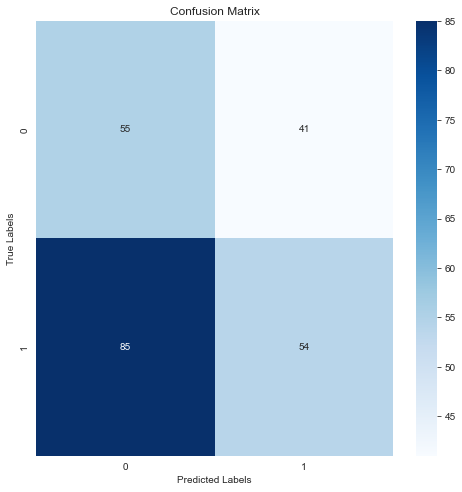

In [98]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred) 

Gradient Boosting model

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.44555555555555554, 'max_depth': 4, 'n_estimators': 130}

Gradient Boosting (test data)
Accuracy: 0.47
Precision: 0.58
Recall: 0.35
F1-score: 0.44
ROC-AUC score: 0.49


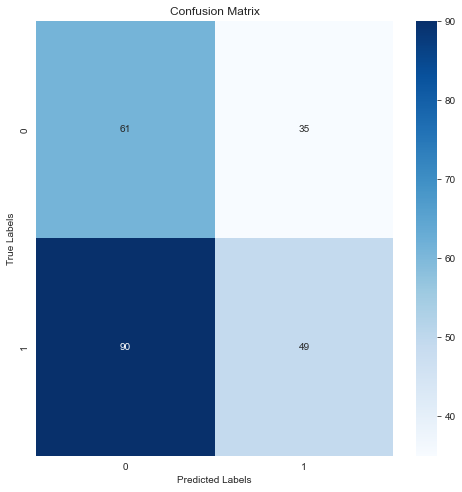

In [100]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Support Vector Machine model

In [101]:
from sklearn.svm import SVC

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
GAMMA = ['scale', 'auto']

PARAM_GRID  = {
    'C': C,
    'kernel': KERNEL,
    'gamma': GAMMA
}

# Create the support vector machine estimator
estimator = SVC(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

Evaluate the best model on the test data

Support Vector Machine (test data)
Accuracy: 0.49
Precision: 0.59
Recall: 0.46
F1-score: 0.52
ROC-AUC score: 0.5


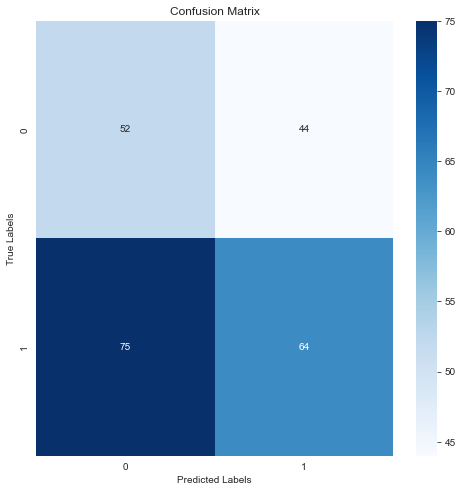

In [102]:
svm_best_estimator = model_searcher.best_estimator_
y_test_pred = svm_best_estimator.predict(X_test_preprocessed)

evaluate_model("Support Vector Machine (test data)", y_test, y_test_pred)

Random Forest model

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)


# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 65}

Random Forest (test data)
Accuracy: 0.48
Precision: 0.58
Recall: 0.44
F1-score: 0.5
ROC-AUC score: 0.49


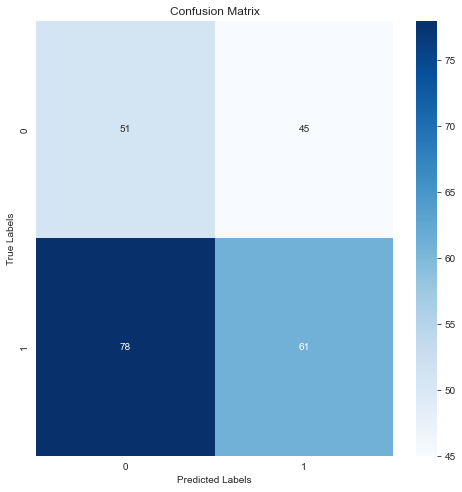

In [104]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [105]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Define the ratio for scale_pos_weight
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# Create a XGBoost classifier with specific parameters
estimator = XGBClassifier(objective='binary:logistic', scale_pos_weight=ratio)


# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.45, 'max_depth': 4, 'n_estimators': 130}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.46
Precision: 0.56
Recall: 0.4
F1-score: 0.46
ROC-AUC score: 0.47


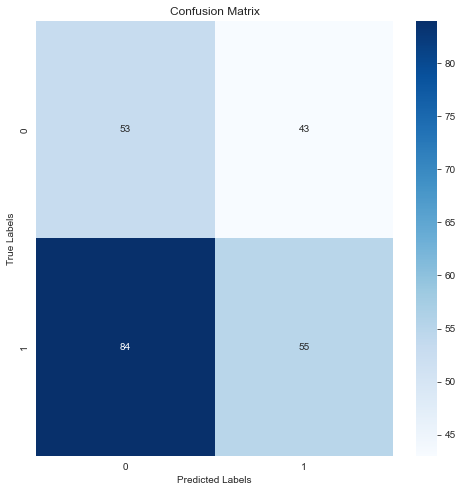

In [106]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [107]:
!pip install pytorch-tabnet
!pip install optuna

In [108]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [109]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-10-08 14:54:22,714] A new study created in memory with name: no-name-08c6d060-7733-4754-9dfe-d9c660ac16d0



Early stopping occurred at epoch 39 with best_epoch = 29 and best_val_0_auc = 0.57322


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:54:49,190] Trial 0 finished with value: 0.5732164268585133 and parameters: {'n_d': 51, 'n_a': 30, 'n_steps': 12, 'gamma': 1.2556051521371105, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.07468215704650658}. Best is trial 0 with value: 0.5732164268585133.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.48962


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:00,423] Trial 1 finished with value: 0.48962080335731417 and parameters: {'n_d': 18, 'n_a': 28, 'n_steps': 15, 'gamma': 0.8526627907409873, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.09818933089063209}. Best is trial 0 with value: 0.5732164268585133.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:02,927] Trial 2 finished with value: 0.5947242206235012 and parameters: {'n_d': 49, 'n_a': 33, 'n_steps': 11, 'gamma': 0.39110555433882366, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.07545250664815724}. Best is trial 2 with value: 0.5947242206235012.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.59472

Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.63512


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:07,987] Trial 3 finished with value: 0.6351169064748201 and parameters: {'n_d': 42, 'n_a': 35, 'n_steps': 10, 'gamma': 0.9291810257022595, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.04850539381711329}. Best is trial 3 with value: 0.6351169064748201.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.56198


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:12,188] Trial 4 finished with value: 0.5619754196642686 and parameters: {'n_d': 56, 'n_a': 42, 'n_steps': 8, 'gamma': 1.480627639341648, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.04761978929476735}. Best is trial 3 with value: 0.6351169064748201.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.60934


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:16,688] Trial 5 finished with value: 0.6093375299760192 and parameters: {'n_d': 35, 'n_a': 37, 'n_steps': 16, 'gamma': 0.9613515003841456, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.04585931676755702}. Best is trial 3 with value: 0.6351169064748201.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55737


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:21,706] Trial 6 finished with value: 0.5573666067146283 and parameters: {'n_d': 40, 'n_a': 29, 'n_steps': 6, 'gamma': 0.8773517792634711, 'n_independent': 8, 'n_shared': 9, 'lambda_sparse': 0.09160648973928505}. Best is trial 3 with value: 0.6351169064748201.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.65168


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:30,831] Trial 7 finished with value: 0.6516786570743405 and parameters: {'n_d': 29, 'n_a': 49, 'n_steps': 17, 'gamma': 0.9742740820657386, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.04136452756931417}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.58835


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:39,724] Trial 8 finished with value: 0.5883543165467626 and parameters: {'n_d': 40, 'n_a': 40, 'n_steps': 15, 'gamma': 1.251746866150861, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.05753147879045578}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.65025


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:55:51,106] Trial 9 finished with value: 0.6502547961630696 and parameters: {'n_d': 34, 'n_a': 59, 'n_steps': 4, 'gamma': 1.416086069305427, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.02364612725226196}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59772


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:04,800] Trial 10 finished with value: 0.5977218225419664 and parameters: {'n_d': 9, 'n_a': 56, 'n_steps': 19, 'gamma': 1.9933565533339328, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.008290555929626964}. Best is trial 7 with value: 0.6516786570743405.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:06,322] Trial 11 finished with value: 0.5789868105515588 and parameters: {'n_d': 28, 'n_a': 64, 'n_steps': 1, 'gamma': 1.5563962836964769, 'n_independent': 7, 'n_shared': 5, 'lambda_sparse': 0.023097566550980133}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.57899


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:10,249] Trial 12 finished with value: 0.5651978417266187 and parameters: {'n_d': 25, 'n_a': 51, 'n_steps': 2, 'gamma': 0.5167729518843259, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.02182759823103278}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.5652

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.60327


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:14,559] Trial 13 finished with value: 0.6032673860911271 and parameters: {'n_d': 29, 'n_a': 11, 'n_steps': 5, 'gamma': 0.22057593825800348, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.0301654989141214}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.63047


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:53,104] Trial 14 finished with value: 0.6304706235011991 and parameters: {'n_d': 19, 'n_a': 52, 'n_steps': 19, 'gamma': 0.5641386271503046, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.0007659862818306384}. Best is trial 7 with value: 0.6516786570743405.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:56:55,478] Trial 15 finished with value: 0.6153702038369305 and parameters: {'n_d': 33, 'n_a': 64, 'n_steps': 4, 'gamma': 0.6786834686719199, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.03438928894567716}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.61537

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.53485


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:04,093] Trial 16 finished with value: 0.5348471223021583 and parameters: {'n_d': 63, 'n_a': 46, 'n_steps': 8, 'gamma': 0.10484822517491565, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.016037586436256003}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53001


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:14,557] Trial 17 finished with value: 0.530013489208633 and parameters: {'n_d': 21, 'n_a': 57, 'n_steps': 13, 'gamma': 1.1603239803982093, 'n_independent': 9, 'n_shared': 6, 'lambda_sparse': 0.03691516020523318}. Best is trial 7 with value: 0.6516786570743405.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:17,353] Trial 18 finished with value: 0.5896657673860912 and parameters: {'n_d': 14, 'n_a': 21, 'n_steps': 8, 'gamma': 1.429154900481119, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.012756389134286013}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.58967

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50521


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:31,908] Trial 19 finished with value: 0.5052083333333333 and parameters: {'n_d': 47, 'n_a': 46, 'n_steps': 16, 'gamma': 1.697730669166636, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.028179494755594833}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.5314


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:35,347] Trial 20 finished with value: 0.5313998800959232 and parameters: {'n_d': 33, 'n_a': 57, 'n_steps': 3, 'gamma': 1.1652524222774379, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.03882734587142589}. Best is trial 7 with value: 0.6516786570743405.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:39,113] Trial 21 finished with value: 0.6251498800959231 and parameters: {'n_d': 42, 'n_a': 23, 'n_steps': 10, 'gamma': 0.9420675779595301, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.05475742469517321}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.62515


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:43,792] Trial 22 finished with value: 0.6099370503597122 and parameters: {'n_d': 44, 'n_a': 46, 'n_steps': 7, 'gamma': 0.7700595509269146, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.04256435017271819}. Best is trial 7 with value: 0.6516786570743405.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.60994

Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.65205


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:52,884] Trial 23 finished with value: 0.6520533573141487 and parameters: {'n_d': 37, 'n_a': 51, 'n_steps': 10, 'gamma': 1.024369174193841, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.052527671324844726}. Best is trial 23 with value: 0.6520533573141487.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.60398


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:57:59,818] Trial 24 finished with value: 0.6039793165467626 and parameters: {'n_d': 27, 'n_a': 51, 'n_steps': 14, 'gamma': 1.0439068569450898, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.056920408793902776}. Best is trial 23 with value: 0.6520533573141487.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.59956


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:58:19,563] Trial 25 finished with value: 0.5995578537170264 and parameters: {'n_d': 37, 'n_a': 60, 'n_steps': 17, 'gamma': 1.043887546264722, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.02931802080617067}. Best is trial 23 with value: 0.6520533573141487.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.6624


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:58:27,235] Trial 26 finished with value: 0.6623950839328537 and parameters: {'n_d': 32, 'n_a': 53, 'n_steps': 10, 'gamma': 1.3225150067808178, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.039422707930599765}. Best is trial 26 with value: 0.6623950839328537.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.58952


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:58:37,164] Trial 27 finished with value: 0.5895158872901679 and parameters: {'n_d': 24, 'n_a': 49, 'n_steps': 10, 'gamma': 0.7559747250416342, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.04147643295170271}. Best is trial 26 with value: 0.6623950839328537.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.64718


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:58:45,242] Trial 28 finished with value: 0.6471822541966427 and parameters: {'n_d': 31, 'n_a': 40, 'n_steps': 12, 'gamma': 1.1107949032854978, 'n_independent': 9, 'n_shared': 3, 'lambda_sparse': 0.06201237099676057}. Best is trial 26 with value: 0.6623950839328537.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.65782


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:59:13,981] Trial 29 finished with value: 0.6578237410071942 and parameters: {'n_d': 54, 'n_a': 55, 'n_steps': 12, 'gamma': 1.2859209390710218, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.06455608177806726}. Best is trial 26 with value: 0.6623950839328537.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.68061


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:59:27,459] Trial 30 finished with value: 0.6806055155875299 and parameters: {'n_d': 54, 'n_a': 54, 'n_steps': 12, 'gamma': 1.292324412726875, 'n_independent': 9, 'n_shared': 4, 'lambda_sparse': 0.06659031570183227}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.62972


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 14:59:49,127] Trial 31 finished with value: 0.6297212230215828 and parameters: {'n_d': 55, 'n_a': 54, 'n_steps': 12, 'gamma': 1.2953730452135108, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.06316563871955447}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.66138


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:00:12,488] Trial 32 finished with value: 0.6613833932853717 and parameters: {'n_d': 54, 'n_a': 62, 'n_steps': 12, 'gamma': 1.286518454023688, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.06479414158401572}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.58633


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:00:30,208] Trial 33 finished with value: 0.5863309352517986 and parameters: {'n_d': 64, 'n_a': 61, 'n_steps': 12, 'gamma': 1.215752416040642, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.06952270141591295}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.66738


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:00:52,682] Trial 34 finished with value: 0.6673785971223022 and parameters: {'n_d': 54, 'n_a': 62, 'n_steps': 14, 'gamma': 1.356675804778882, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.0761270463705334}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.67607


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:01:12,827] Trial 35 finished with value: 0.6760716426858513 and parameters: {'n_d': 58, 'n_a': 62, 'n_steps': 14, 'gamma': 1.3853695366238943, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.0761348720340504}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.49569


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:01:31,109] Trial 36 finished with value: 0.4956909472422062 and parameters: {'n_d': 60, 'n_a': 59, 'n_steps': 15, 'gamma': 1.371045696264484, 'n_independent': 9, 'n_shared': 6, 'lambda_sparse': 0.07556030628396505}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.68057


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:01:57,137] Trial 37 finished with value: 0.6805680455635492 and parameters: {'n_d': 49, 'n_a': 62, 'n_steps': 14, 'gamma': 1.5299048183139021, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.07808466571565169}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.60638


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:02:36,746] Trial 38 finished with value: 0.6063773980815348 and parameters: {'n_d': 50, 'n_a': 64, 'n_steps': 13, 'gamma': 1.5489887352853837, 'n_independent': 10, 'n_shared': 5, 'lambda_sparse': 0.08397815723423954}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.55486


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:02:57,697] Trial 39 finished with value: 0.5548561151079137 and parameters: {'n_d': 59, 'n_a': 61, 'n_steps': 14, 'gamma': 1.5113818695492582, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.07703452610543783}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.63617


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:03:30,644] Trial 40 finished with value: 0.636166067146283 and parameters: {'n_d': 46, 'n_a': 58, 'n_steps': 14, 'gamma': 1.643157100096909, 'n_independent': 8, 'n_shared': 6, 'lambda_sparse': 0.08253717222853811}. Best is trial 30 with value: 0.6806055155875299.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.64516


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-10-08 15:03:45,749] Trial 41 finished with value: 0.6451588729016786 and parameters: {'n_d': 52, 'n_a': 55, 'n_steps': 11, 'gamma': 1.3403545820109382, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.06978331263165415}. Best is trial 30 with value: 0.6806055155875299.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.90813 |  0:00:00s
epoch 1  | loss: 2.90908 |  0:00:01s
epoch 2  | loss: 2.72612 |  0:00:02s
epoch 3  | loss: 2.75086 |  0:00:03s
epoch 4  | loss: 2.72042 |  0:00:03s
epoch 5  | loss: 2.44471 |  0:00:04s
epoch 6  | loss: 1.87314 |  0:00:05s
epoch 7  | loss: 1.62277 |  0:00:06s
epoch 8  | loss: 1.68524 |  0:00:06s
epoch 9  | loss: 1.80384 |  0:00:07s
epoch 10 | loss: 1.51205 |  0:00:08s
epoch 11 | loss: 1.64399 |  0:00:09s
epoch 12 | loss: 1.33858 |  0:00:09s
epoch 13 | loss: 1.58317 |  0:00:10s
epoch 14 | loss: 1.80399 |  0:00:11s
epoch 15 | loss: 1.42499 |  0:00:12s
epoch 16 | loss: 1.4482  |  0:00:12s
epoch 17 | loss: 2.52082 |  0:00:13s
epoch 18 | loss: 1.4583  |  0:00:14s
epoch 19 | loss: 1.79124 |  0:00:15s
epoch 20 | loss: 1.6901  |  0:00:15s
epoch 21 | loss: 1.24251 |  0:00:16s
epoch 22 | loss: 1.3592  |  0:00:17s
epoch 23 | loss: 1.32264 |  0:00:18s
epoch 24 | loss: 1.26638 |  0:00:19s
epoch 25 | loss: 1.12021 |  0:00:19s
epoch 26 | loss: 1.48295 |  0:00:20s
e

{'n_d': 54,
 'n_a': 54,
 'n_steps': 12,
 'gamma': 1.292324412726875,
 'n_independent': 9,
 'n_shared': 4,
 'lambda_sparse': 0.06659031570183227}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.52
Precision: 0.62
Recall: 0.49
F1-score: 0.55
ROC-AUC score: 0.53


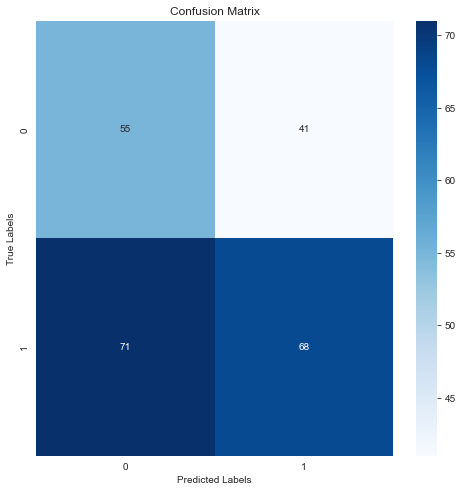

In [110]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [111]:
the_best_model_ever = rf_best_estimator

Feature importance

In [112]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
DVA_Std_Fixations_Pre,0.213505
DVA_Sem_Fixations_Pre,0.204150
DVA_Max_Fixations_Pre,0.174161
DVA_Min_Fixations_Pre,0.171111
DVA_Median_Fixations_Pre,0.130285
DVA_Mean_Fixations_Pre,0.106788


Save the best model

In [113]:
import pickle

# Save the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'wb') as f:
    pickle.dump(the_best_model_ever, f)

In [114]:
# Load the best model
with open(os.path.join(config.classification_resource_dir, 'the_best_model_ever.pkl'), 'rb') as f:
    the_saved_model = pickle.load(f)

Desicion Tree model

In [115]:
from sklearn.tree import DecisionTreeClassifier

# Define the range of values for each hyperparameter
MAX_DEPTH = range(1, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the decision tree estimator
estimator = DecisionTreeClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

Decision Tree (test data)
Accuracy: 0.44
Precision: 0.56
Recall: 0.25
F1-score: 0.35
ROC-AUC score: 0.48


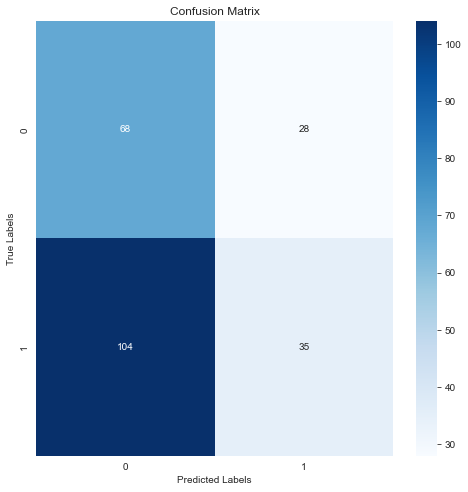

In [116]:
dt_best_estimator = model_searcher.best_estimator_
y_test_pred = dt_best_estimator.predict(X_test_preprocessed)

evaluate_model("Decision Tree (test data)", y_test, y_test_pred)

Visualize the DecisionTreeClassifier

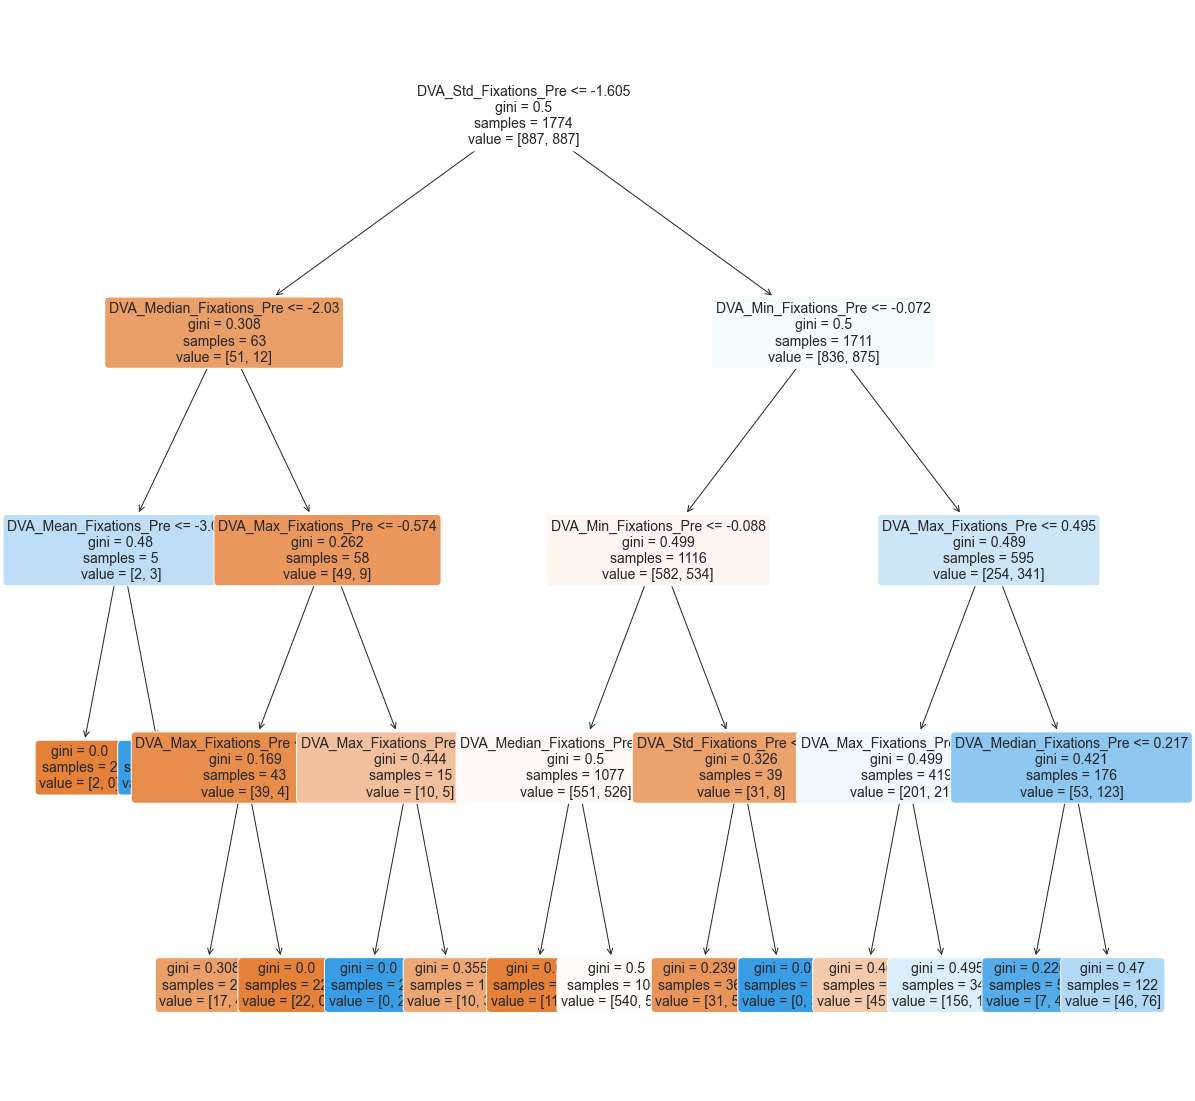

In [117]:
from sklearn.tree import plot_tree

# Plot the first tree
plt.figure(figsize=(20, 20))
plot_tree(dt_best_estimator, feature_names=X_train_preprocessed.columns, filled=True, rounded=True, fontsize=14)

# Save the tree as png file
plt.savefig('plot_tree.png')

# Show the plot
plt.show()

Plot Decision Tree with Graphviz

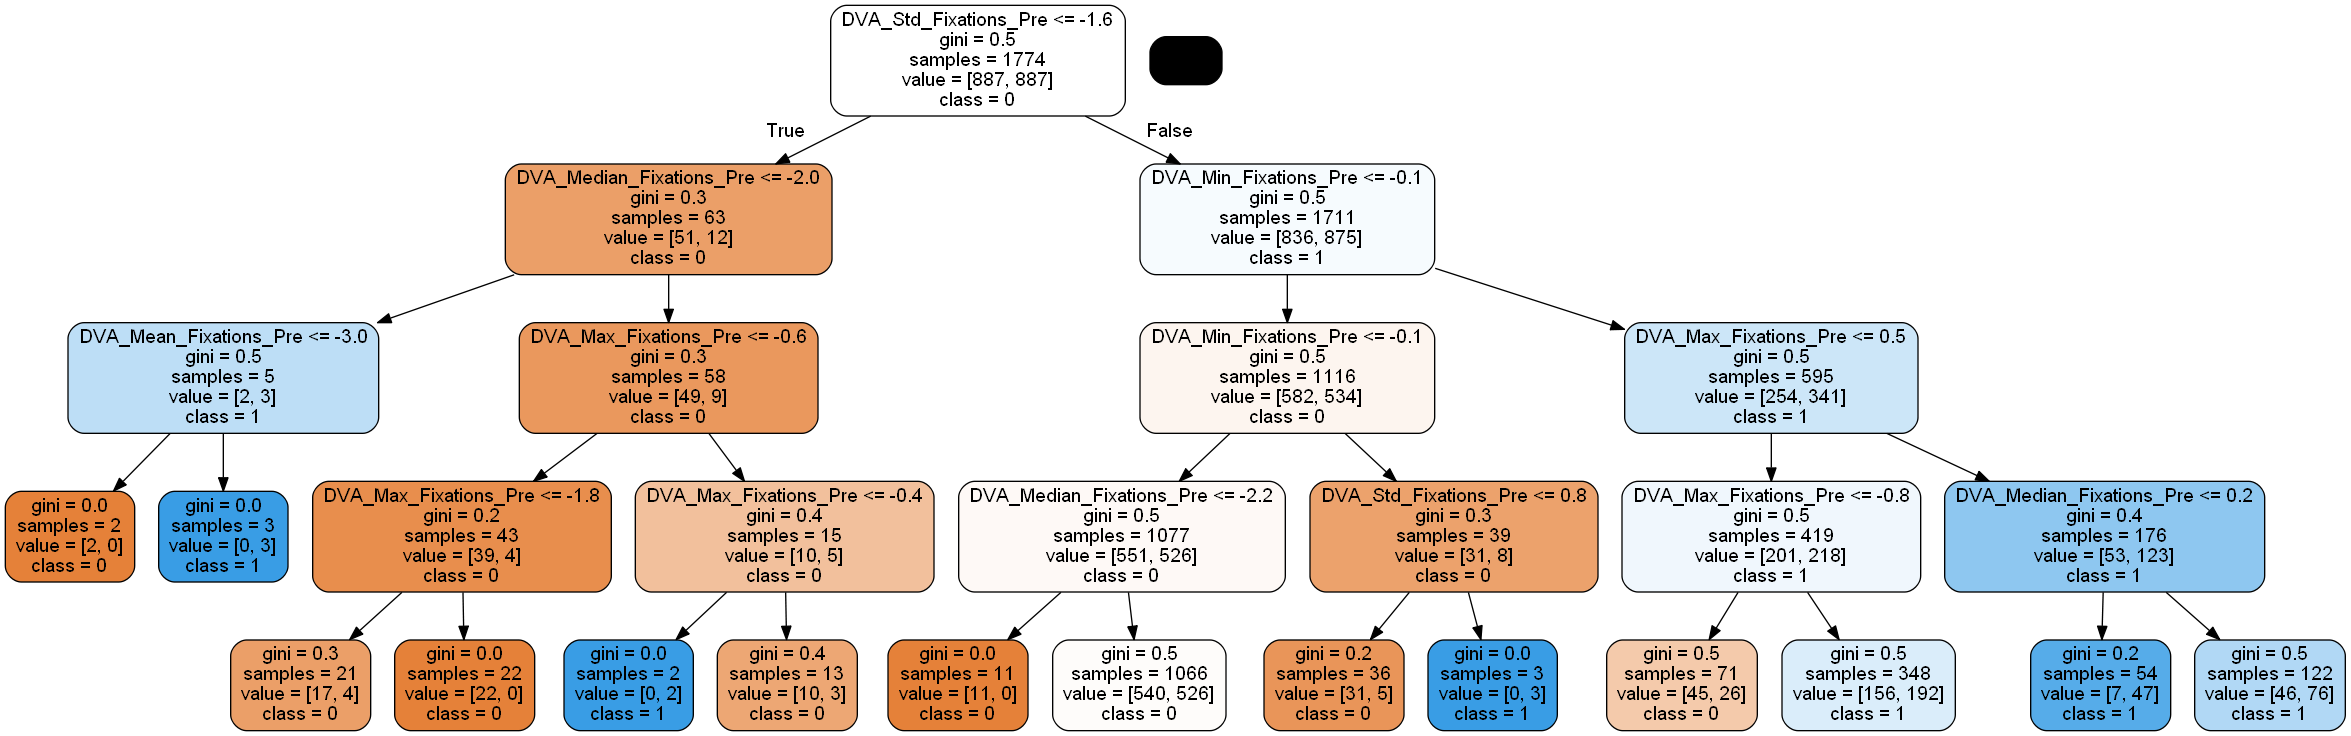

In [118]:
from sklearn.tree import export_graphviz
import pydot

# Export the decision tree as a dot file
export_graphviz(dt_best_estimator, out_file='decision_tree.dot', feature_names=X_train_preprocessed.columns, rounded=True, precision=1, filled=True, class_names=['0', '1'])

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('decision_tree.dot')

# Write graph to a png file
graph.write_png('decision_tree.png')

# Display the tree
from IPython.display import Image
Image(filename='decision_tree.png')

Print Text Representation

In [119]:
from sklearn.tree import export_text

# Print the text representation of the decision tree
print(export_text(dt_best_estimator, feature_names=list(X_train_preprocessed.columns)))

|--- DVA_Std_Fixations_Pre <= -1.61
|   |--- DVA_Median_Fixations_Pre <= -2.03
|   |   |--- DVA_Mean_Fixations_Pre <= -3.01
|   |   |   |--- class: 0.0
|   |   |--- DVA_Mean_Fixations_Pre >  -3.01
|   |   |   |--- class: 1.0
|   |--- DVA_Median_Fixations_Pre >  -2.03
|   |   |--- DVA_Max_Fixations_Pre <= -0.57
|   |   |   |--- DVA_Max_Fixations_Pre <= -1.80
|   |   |   |   |--- class: 0.0
|   |   |   |--- DVA_Max_Fixations_Pre >  -1.80
|   |   |   |   |--- class: 0.0
|   |   |--- DVA_Max_Fixations_Pre >  -0.57
|   |   |   |--- DVA_Max_Fixations_Pre <= -0.42
|   |   |   |   |--- class: 1.0
|   |   |   |--- DVA_Max_Fixations_Pre >  -0.42
|   |   |   |   |--- class: 0.0
|--- DVA_Std_Fixations_Pre >  -1.61
|   |--- DVA_Min_Fixations_Pre <= -0.07
|   |   |--- DVA_Min_Fixations_Pre <= -0.09
|   |   |   |--- DVA_Median_Fixations_Pre <= -2.19
|   |   |   |   |--- class: 0.0
|   |   |   |--- DVA_Median_Fixations_Pre >  -2.19
|   |   |   |   |--- class: 0.0
|   |   |--- DVA_Min_Fixations_Pre >  

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

Explore the best features

Index(['DVA_Std_Fixations_Pre', 'DVA_Sem_Fixations_Pre',
       'DVA_Max_Fixations_Pre', 'DVA_Min_Fixations_Pre',
       'DVA_Median_Fixations_Pre'],
      dtype='object')
Gradient Boosting (test data, top 10 features)
Accuracy: 0.49
Precision: 0.59
Recall: 0.42
F1-score: 0.49
ROC-AUC score: 0.5


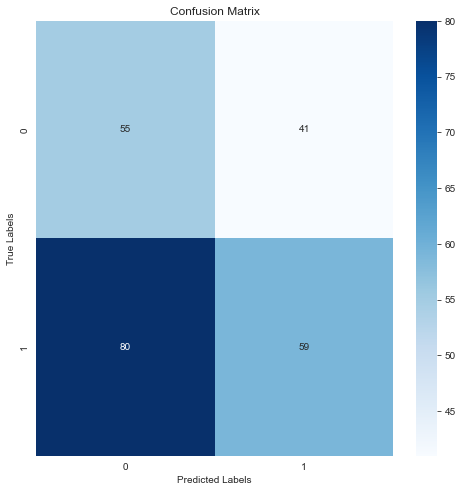

In [121]:
# Get the indices of the top 10 features
top10_idx = feature_importances.head(5).index
print(top10_idx)

# Subset the data based on the top 10 features
X_train_top10 = X_train_preprocessed[top10_idx]
X_test_top10 = X_test_preprocessed[top10_idx]

# Train the model on the top 10 features
the_saved_model.fit(X_train_top10, y_train)

# Evaluate the model on the test data
y_test_pred = the_saved_model.predict(X_test_top10)
evaluate_model("Gradient Boosting (test data, top 10 features)", y_test, y_test_pred)

In [122]:
# plot the top 1 feature based on features_df and labels_df (pop) - to see the difference between the groups

DVA_Std_Fixations_Pre
   DVA_Std_Fixations_Pre  pop
1             -58.475124  1.0
2               0.479160  0.0
3               6.585251  0.0
4             -34.205880  1.0
6              58.361655  0.0


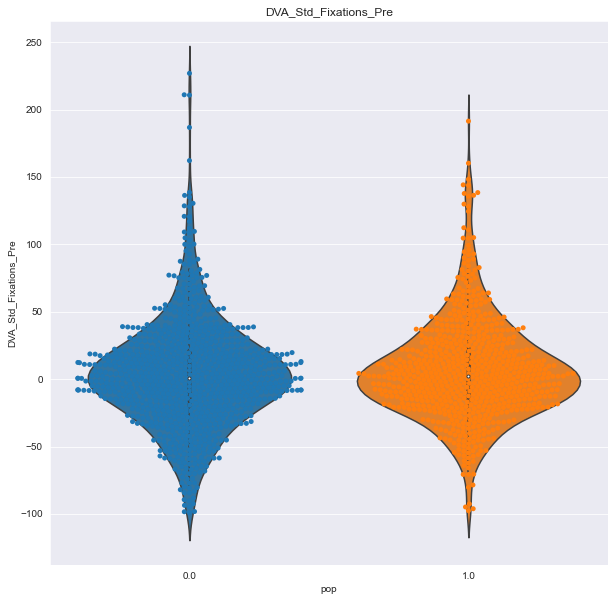

In [123]:
import seaborn as sns

# Get the index of the top 1 feature as string
top1_idx = str(feature_importances.head(1).index[0]) # 'Duration_Saccades_End_First_In_RoI_Pre' 
print(top1_idx)

# Subset the data based on the top 1 feature
data_df_top1 = features_df.merge(labels_df, left_index=True, right_index=True)[[top1_idx, 'pop']]
print(data_df_top1.head())

# Plot the top 1 feature in a swarmplot
plt.figure(figsize=(10, 10))
sns.swarmplot(x='pop', y=top1_idx, data=data_df_top1)
sns.violinplot(x='pop', y=top1_idx, data=data_df_top1)
plt.title(top1_idx)
plt.show()

Plot both distributions side by side of the top 1 feature for the two groups

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


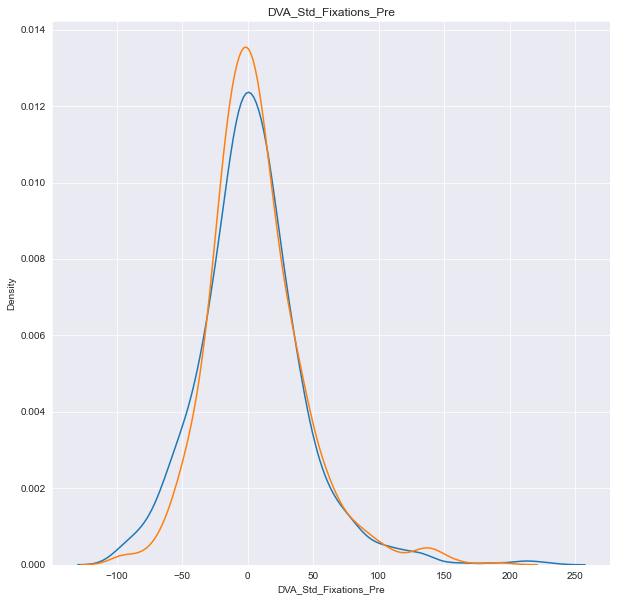

In [124]:
plt.figure(figsize=(10, 10))
sns.distplot(data_df_top1[data_df_top1['pop'] == 0][top1_idx], hist=False, label='0')
sns.distplot(data_df_top1[data_df_top1['pop'] == 1][top1_idx], hist=False, label='1')
plt.title(top1_idx)
plt.show()